## **1. Overview**
Data transaksi yang terus bertambah setiap harinya, apabila diolah dengan baik, dapat menjadi strategi untuk pemasaran yang lebih efektif melalui market basket analysis. Analisis ini memungkinkan bisnis untuk mengidentifikasi pola pembelian yang relevan dan hubungan antara produk atau layanan yang dibeli oleh pelanggan.

Dengan memahami pola-pola ini, perusahaan dapat mengoptimalkan strategi pemasaran, penempatan produk, serta penentuan harga. Misalnya, jika analisis menunjukkan bahwa pelanggan cenderung membeli produk A dan B bersamaan, maka perusahaan dapat mempertimbangkan untuk menggabungkan atau mengiklankan kedua produk tersebut bersama-sama untuk meningkatkan penjualan.

## **2. Import Libraries**

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules



## **3. Data Understanding**

In [123]:
df = pd.read_excel('mixuesales.xlsx')
print("Ukuran Dataframe :", df.shape)
df.head()

Ukuran Dataframe : (1589, 4)


,id_transaksi,produk,kuantitas,tanggal
0,1,creamy mango boba,1,2023-10-01
1,1,kiwi fruit tea,1,2023-10-01
2,2,mango sundae,1,2023-10-01
3,2,strawberry lucky sundae,2,2023-10-01
4,2,sundae,2,2023-10-01


Dari informasi yang ada pada dataset, dataset memiliki beberapa fitur yaitu sebagai berikut:


1.   **id_transaksi** : identifier unik setiap transaksi
2.   **produk** : nama produk yang dibeli dalam sebuah transaksi
3. **kuantitas** : jumlah produk yang dibeli
4. **tanggal** : tanggal ketika transaksi dilakukan



In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_transaksi  1589 non-null   int64         
 1   produk        1589 non-null   object        
 2   kuantitas     1589 non-null   int64         
 3   tanggal       1588 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 49.8+ KB


In [125]:
# Mengubah format tanggal dari yyyy-mm-dd menjadi dd-mm-yyyy
df['tanggal'] = pd.to_datetime(df['tanggal'], format="%d-%m-%Y")

In [126]:
df['tanggal'].dtype

dtype('<M8[ns]')

In [127]:
# Menambahkan kolom bulan dan hari
df["bulan"] = df["tanggal"].dt.month
df["hari"] = df["tanggal"].dt.weekday
df.head()

,id_transaksi,produk,kuantitas,tanggal,bulan,hari
0,1,creamy mango boba,1,2023-10-01,10.0,6.0
1,1,kiwi fruit tea,1,2023-10-01,10.0,6.0
2,2,mango sundae,1,2023-10-01,10.0,6.0
3,2,strawberry lucky sundae,2,2023-10-01,10.0,6.0
4,2,sundae,2,2023-10-01,10.0,6.0


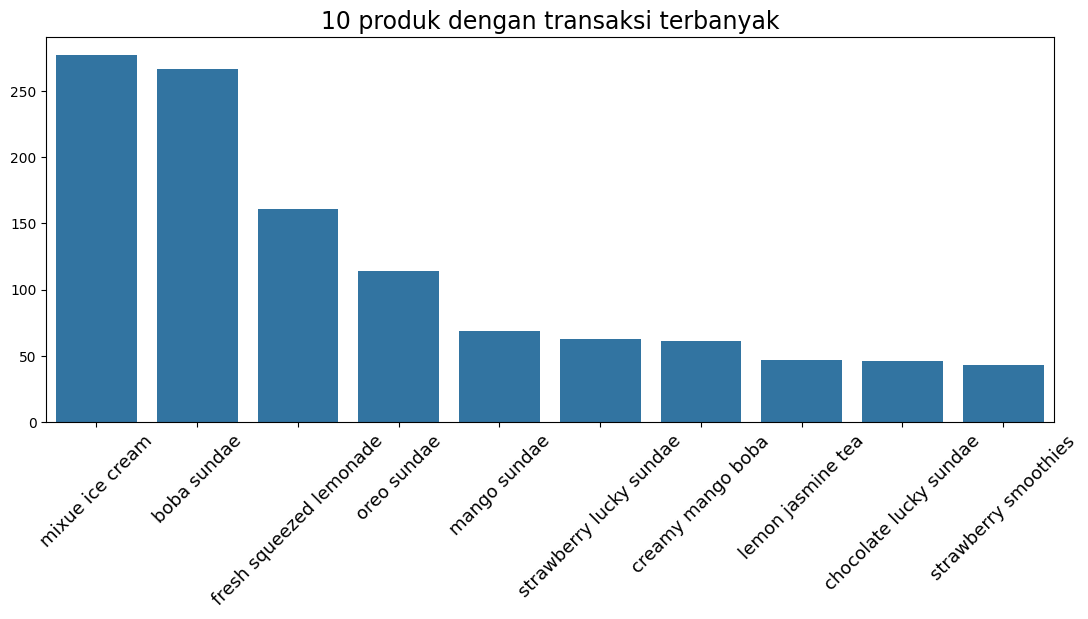

In [128]:
# Melihat 10 produk dengan transaksi terbanyak
plt.figure(figsize=(13,5))

sns.barplot(x =df["produk"].value_counts()[:10].index, 
            y = df["produk"].value_counts()[:10].values)
plt.xlabel(""); plt.ylabel("")
plt.xticks(size=13, rotation=45)
plt.title('10 produk dengan transaksi terbanyak', size=17)
plt.show()

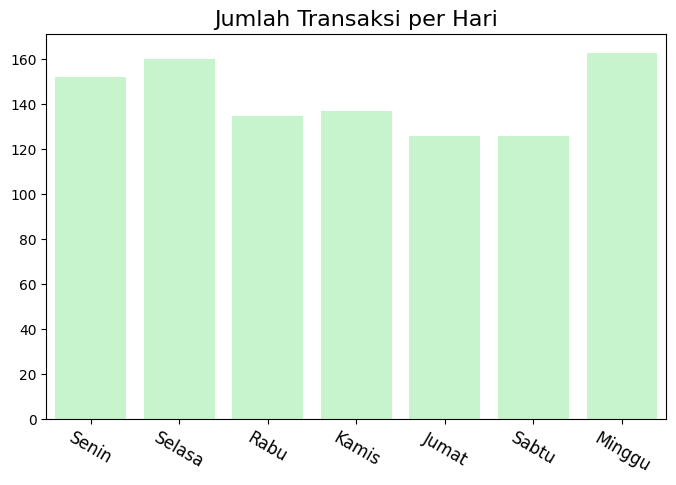

In [129]:
# Jumlah transaksi berdasarkan hari
data_perhari = df.groupby('hari')['id_transaksi'].nunique()

plt.figure(figsize=(8,5))
sns.barplot(
    x = ["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"],
    y = data_perhari.values, color="#BFFCC6")
plt.xticks(size=12, rotation=-30)
plt.title("Jumlah Transaksi per Hari", size=16)
plt.show()

## **4. Pre-processing**


Menyama-ratakan format nama produk dengan mengubah semua nama produk menjadi huruf kecil dan menghapus whitespace.

In [130]:
df['produk'] = df['produk'].apply(lambda item: item.lower())

In [131]:
df['produk'] = df['produk'].apply(lambda item: item.strip())

In [132]:
df = df[['id_transaksi', 'produk']].copy()
df.head(10)

,id_transaksi,produk
0,1,creamy mango boba
1,1,kiwi fruit tea
2,2,mango sundae
3,2,strawberry lucky sundae
4,2,sundae
5,2,oreo sundae
6,3,fresh squeezed lemonade
7,3,mixue ice cream
8,4,fresh squeezed lemonade
9,4,peach earl grey tea


Menambahkan kolom count untuk setiap produk yang muncul tiap transaksi. 

In [133]:
produk_count = df.groupby(['id_transaksi','produk'])['produk'].count().reset_index(name="count")
produk_count.head(10)

,id_transaksi,produk,count
0,1,creamy mango boba,1
1,1,kiwi fruit tea,1
2,2,mango sundae,1
3,2,oreo sundae,1
4,2,strawberry lucky sundae,1
5,2,sundae,1
6,3,fresh squeezed lemonade,1
7,3,mixue ice cream,1
8,4,fresh squeezed lemonade,1
9,4,peach earl grey tea,1


## **Data Transformation**

Mengubah data transaksi menjadi format 1 dan 0.

In [134]:
produk_count_pivot = produk_count.pivot_table(index='id_transaksi', columns='produk', values='count', aggfunc='sum').fillna(0)
print("Ukuran Dataset : ", produk_count_pivot.shape)
produk_count_pivot = produk_count_pivot.astype("int32")
produk_count_pivot.head()

Ukuran Dataset :  (1000, 39)


produk,berry bean sundae,boba shake,boba sundae,brown sugar pearl milk tea,chocolate lucky sundae,chocolate oreo smoothies,chocolate sundae,coconut jelly milk tea,creamy mango boba,earl grey with 2 toppings,...,peach earl grey tea,peach tea,pearl milk tea,red bean milk tea,signature mixed milk tea,strawberry lucky sundae,strawberry mishake,strawberry smoothies,sundae,supreme mixed milk tea
id_transaksi,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
def encode(x):
    if x<=0:
        return 0
    elif x>=1:
        return 1

produk_count_pivot = produk_count_pivot.applymap(encode)
produk_count_pivot.head()

C:\Users\Alisya Rahma Safitra\AppData\Local\Temp\ipykernel_15888\2962238093.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  produk_count_pivot = produk_count_pivot.applymap(encode)


produk,berry bean sundae,boba shake,boba sundae,brown sugar pearl milk tea,chocolate lucky sundae,chocolate oreo smoothies,chocolate sundae,coconut jelly milk tea,creamy mango boba,earl grey with 2 toppings,...,peach earl grey tea,peach tea,pearl milk tea,red bean milk tea,signature mixed milk tea,strawberry lucky sundae,strawberry mishake,strawberry smoothies,sundae,supreme mixed milk tea
id_transaksi,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
print("Ukuran Dataset : ", produk_count_pivot.shape)
print("Jumlah Transaksi : ", produk_count_pivot.shape[0])
print("Jumlah Produk : ", produk_count_pivot.shape[1])

Ukuran Dataset :  (1000, 39)
Jumlah Transaksi :  1000
Jumlah Produk :  39


## **5. Association Rule**
Association rule adalah aturan yang mengidentifikasi hubungan antara item atau produk yang sering muncul bersamaan dalam transaksi. Ada 3 nilai yang diperhatikan dalam association rule yaitu nilai support, confidence, dan lift.


1.   **Support** adalah nilai persentase kombinasi item muncul dalam data.
2.   **Confidence** adalah kuatnya keterkaitan item-item dari association rule.
3. **Lift** adalah rasio antara confidence dan expected confidence dari suatu aturan asosiasi. Expected confidence didefinisikan sebagai hasil kali antara support dari itemset antecedents dan itemset consequents, dibagi dengan support dari itemset antecedents. Nilai lift yang lebih besar dari 1 menunjukkan bahwa itemset consequents cenderung muncul bersamaan dengan itemset antecedents lebih sering daripada yang diharapkan secara acak.

In [137]:
# Mencari itemset dengan nilai minimum support 1%
support = 0.01
frequent_items = apriori(produk_count_pivot, min_support=support, use_colnames=True)
frequent_items.sort_values("support", ascending=False).head(10)

c:\Users\Alisya Rahma Safitra\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
14,0.277,(mixue ice cream)
1,0.267,(boba sundae)
6,0.161,(fresh squeezed lemonade)
15,0.114,(oreo sundae)
13,0.069,(mango sundae)
19,0.063,(strawberry lucky sundae)
5,0.061,(creamy mango boba)
11,0.047,(lemon jasmine tea)
3,0.046,(chocolate lucky sundae)
21,0.043,(strawberry smoothies)


In [138]:
# Aturan asosiasi dengan nilai lift ratio di atas 1
rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules['conf_supp'] = rules['confidence'] * rules['support']

# Inisialisasi penyimpanan aturan yang unik
unique_rules = []
rules_checked = set()

# Iterasi melalui setiap aturan untuk menyaring aturan yang unik
for index, row in rules.iterrows():
    rule = (frozenset(row['antecedents']), frozenset(row['consequents']))
    rev_rule = (frozenset(row['consequents']), frozenset(row['antecedents']))

    if rule not in rules_checked and rev_rule not in rules_checked:
        unique_rules.append(row)
        rules_checked.add(rule)

# Konversi hasil penyaringan aturan unik menjadi DataFrame
unique_rules_df = pd.DataFrame(unique_rules)
selected_columns = ['antecedents', 'consequents', 'support', 'confidence', 'lift', 'conf_supp']
top_unique_rules = unique_rules_df[selected_columns].sort_values(by='confidence', ascending=False).head(10)
print(top_unique_rules)


                    antecedents                consequents  support  \
4         (lemon earl grey tea)        (lemon jasmine tea)    0.011   
2              (kiwi fruit tea)  (fresh squeezed lemonade)    0.010   
0  (brown sugar pearl milk tea)              (boba sundae)    0.011   
6                (mango sundae)              (oreo sundae)    0.010   
8                 (oreo sundae)  (strawberry lucky sundae)    0.010   

   confidence       lift  conf_supp  
4    0.500000  10.638298   0.005500  
2    0.285714   1.774623   0.002857  
0    0.268293   1.004842   0.002951  
6    0.144928   1.271294   0.001449  
8    0.087719   1.392370   0.000877  
